In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

In [ ]:
movie = pd.read_csv('/content/movies (1).csv')
rating = pd.read_csv('/content/ratings.csv')

In [ ]:
# Merge movies and ratings data
data = pd.merge(movie, rating, on='movieId')
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [ ]:
# Data Preprocessing
data = data[['userId', 'movieId', 'rating']]



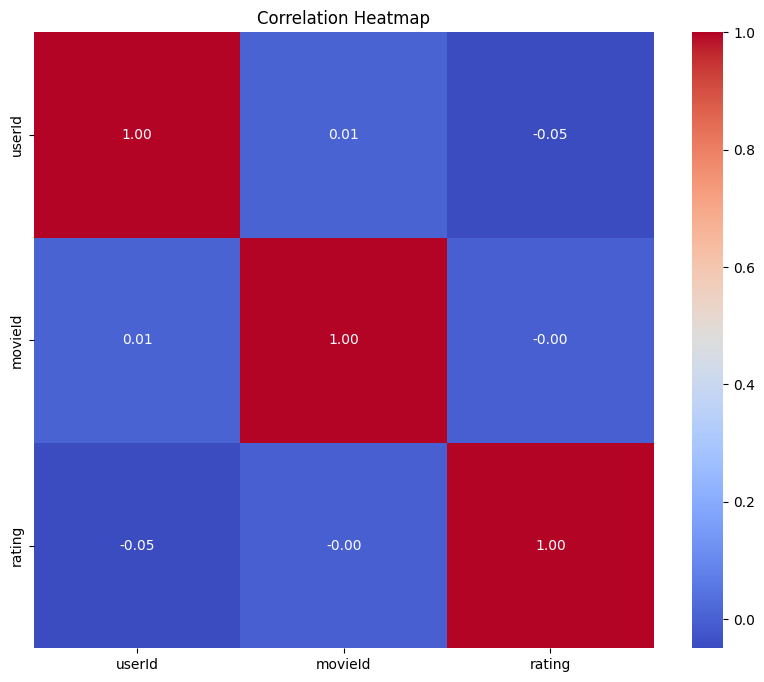

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

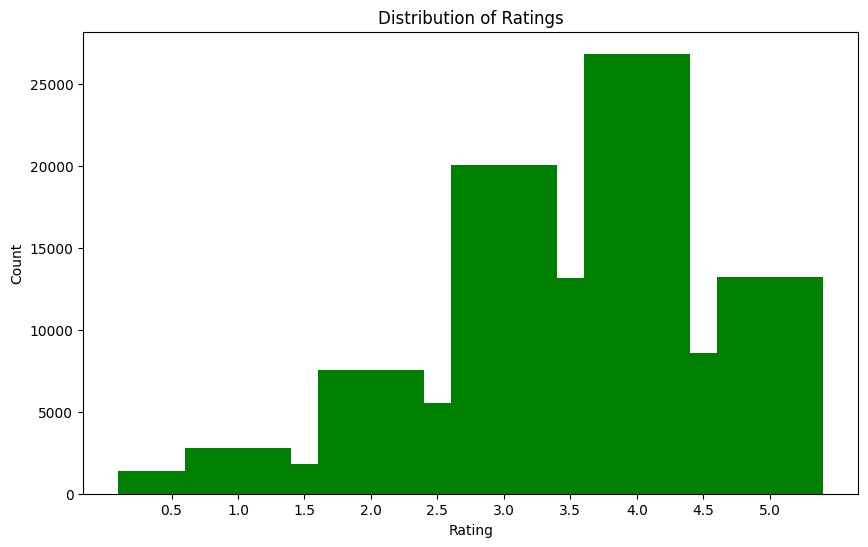

In [ ]:
# Count the occurrences of each rating
rating_counts = data['rating'].value_counts().sort_index()

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(rating_counts.index, rating_counts.values, color='green')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rating_counts.index)  # Set x-ticks to match the unique ratings
plt.show()

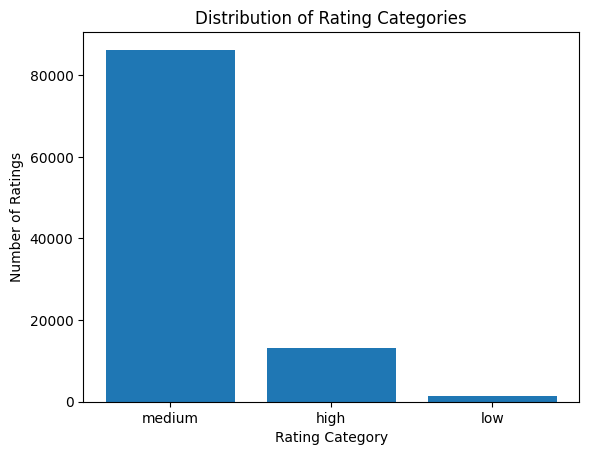

In [ ]:
# Encode categorical variables (userId and movieId)
label_encoder = LabelEncoder()
data['userId'] = label_encoder.fit_transform(data['userId'])
data['movieId'] = label_encoder.fit_transform(data['movieId'])

# Define rating categories
# Example: 'low' for ratings < 0.5, 'medium' for ratings between 0.5 and 4.5, 'high' for ratings >= 4.5
data['rating_category'] = pd.cut(data['rating'], bins=[0, 0.5, 4.5, 5], labels=['low', 'medium', 'high'])

# Count the occurrences of each rating category
rating_counts = data['rating_category'].value_counts()

# Plotting the bar graph
plt.bar(rating_counts.index, rating_counts.values)

# Adding title and labels
plt.title('Distribution of Rating Categories')
plt.xlabel('Rating Category')
plt.ylabel('Number of Ratings')

# Display the plot
plt.show()

In [ ]:
# Split data into features and target
X = data.drop(['rating','rating_category','userId'], axis=1)
y = data['rating_category']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
print("Traing by naive_bayes...")

# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the training data
nb_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred_nb = nb_classifier.predict(X_test_scaled)

# Evaluate the model
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb, average='weighted')
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1 Score:", nb_f1)


Traing by naive_bayes...
Naive Bayes Accuracy: 0.8555632685442285
Naive Bayes F1 Score: 0.7889663682083564


In [ ]:
# Define the parameter grid (there are no parameters to tune for GaussianNB)
param_grid = {}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator
best_nb_classifier = grid_search.best_estimator_

# Predictions
y_pred_nb = best_nb_classifier.predict(X_test_scaled)

# Evaluate the model
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb, average='weighted')
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1 Score:", nb_f1)

Naive Bayes Accuracy: 0.8555632685442285
Naive Bayes F1 Score: 0.7889663682083564


In [ ]:
print("Training by Logistic Regression...")
# Logistic Regression
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
Laccuracy = accuracy_score(y_test, y_pred)
Lf1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy lr:", Laccuracy)
print("F1 Score lr:", Lf1)

Training by Logistic Regression...
Accuracy lr: 0.8555632685442285
F1 Score lr: 0.7889663682083564


In [ ]:
print("Result by HyperParameter Tuning : ")
# Logistic Regression
log_reg = LogisticRegression()

# Define the grid of hyperparameters
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
# Use the best parameters to create the model
best_log_reg = LogisticRegression(**best_params)

# Fit the model to the training data
best_log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = best_log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy with ht lr:", accuracy)
print("F1 Score ht lr:", f1)

Result by HyperParameter Tuning : 
Best Hyperparameters: {'C': 0.001, 'max_iter': 100, 'solver': 'newton-cg'}
Accuracy with ht lr: 0.8555632685442285
F1 Score ht lr: 0.7889663682083564


In [ ]:
print("Training by Decision Tree...")
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Fit the model to the training data
dt_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred = dt_classifier.predict(X_test_scaled)

# Evaluate the model
Daccuracy = accuracy_score(y_test, y_pred)
Df1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", Daccuracy)
print("F1 Score:", Df1)

Training by Decision Tree...
Accuracy: 0.8444069813566045
F1 Score: 0.7875104732933788


In [ ]:
print("Result by HyperParameter Tuning : ")
# Define the grid of hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best parameters to create the model
best_dt_classifier = DecisionTreeClassifier(**best_params)

# Fit the model to the training data
best_dt_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred = best_dt_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Result by HyperParameter Tuning : 
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.8555632685442285
F1 Score: 0.7889663682083564


In [ ]:
print("Traing by RandomForest...")

# Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
Raccuracy = accuracy_score(y_test, y_pred)
Rf1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", Raccuracy)
print("F1 Score:", Rf1)


Traing by RandomForest...
Accuracy: 0.8492165807219357
F1 Score: 0.7888309539817318


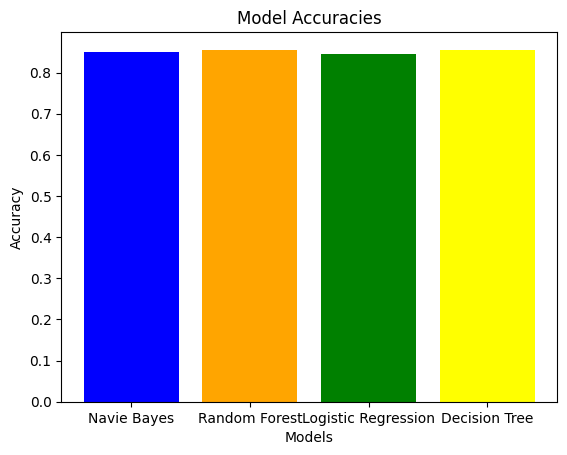

In [ ]:
# Model labels
models = ['Navie Bayes','Random Forest', 'Logistic Regression', 'Decision Tree']

# Accuracies list
accuracies = [Raccuracy, Laccuracy, Daccuracy, nb_accuracy]

# Plotting the bar graph
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'yellow'])

# Adding title and labels
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Display the plot
plt.show()

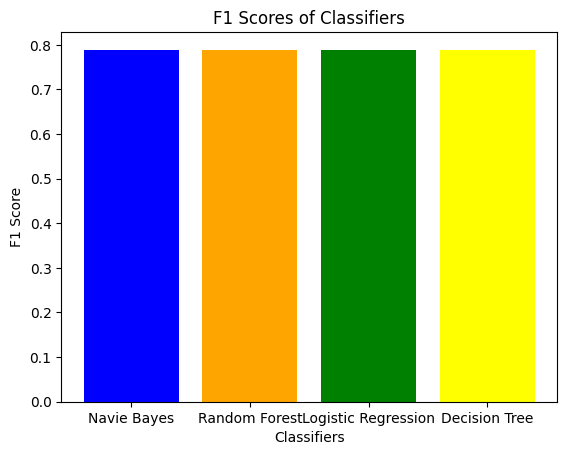

In [ ]:
# F1 scores list
f1_scores = [Rf1, Lf1, Df1, nb_f1]

# Plotting the bar graph
plt.bar(models, f1_scores, color=['blue', 'orange', 'green', 'yellow'])

# Adding title and labels
plt.title('F1 Scores of Classifiers')
plt.xlabel('Classifiers')
plt.ylabel('F1 Score')

# Display the plot
plt.show()

